In [268]:
from pharynx_redox import (
    pharynx_io as pio, 
    image_processing as ip, 
    experiment, 
    plots, 
    profile_processing,
    data_analysis as da
)

import xarray as xr
from pathlib import Path
from tqdm import tqdm_notebook
from scipy import signal
import seaborn as sns
from importlib import reload
import numpy as np
import logging
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from joblib import Parallel, delayed
from math import sqrt

reload(logging)
reload(experiment)
reload(pio)
reload(ip)
reload(plots)
reload(profile_processing)
reload(da)

# pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 100)

logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG, datefmt='%I:%M:%S')

In [45]:
meta_dir = Path('/Users/sean/code/pharynx_redox/data/paired_ratio/')
rot_fl = xr.load_dataarray('/Users/sean/code/pharynx_redox/data/paired_ratio/all_rot_fl.nc')
prof_raw = da.load_all_cached_profile_data(meta_dir, '**/*single_unreg/*profile_data.nc')

In [46]:
rot_R = rot_fl.sel(wavelength='410') / rot_fl.sel(wavelength='470')

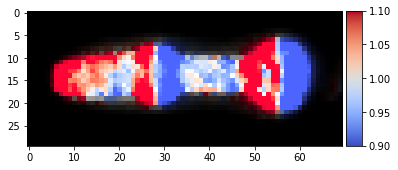

In [426]:
reload(plots)

i = 0
i_410 = rot_fl[i].sel(wavelength='410', pair=0)
i_410_shift = np.roll(i_410, 1, axis=1) 
R = (i_410 / i_410_shift)[50:80,50:120]
FL = np.maximum(i_410,i_410_shift)[50:80,50:120]

ax = plt.subplot(111)
plots.imshow_ratio_normed(R, FL, prof_raw[i].sel(wavelength='r'),
                          i_min=500,
                          i_max=2000,
                          r_min=.9,
                          r_max=1.1,
                          ax=ax,
                         )
plots.add_img_colorbar(ax, size='5%')

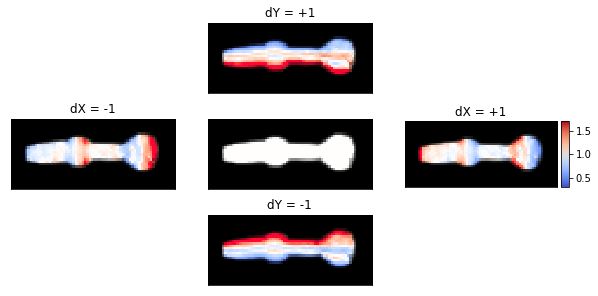

In [434]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10,5))
gs = GridSpec(3, 3, figure=fig)

ax_left = fig.add_subplot(gs[1, 0])
ax_left.axes.get_xaxis().set_visible(False)
ax_left.axes.get_yaxis().set_visible(False)
ax_left.set_title('dX = -1')

ax_center = fig.add_subplot(gs[1,1])
ax_center.axes.get_xaxis().set_visible(False)
ax_center.axes.get_yaxis().set_visible(False)

ax_right = fig.add_subplot(gs[1, 2])
ax_right.axes.get_xaxis().set_visible(False)
ax_right.axes.get_yaxis().set_visible(False)
ax_right.set_title('dX = +1')

ax_top = fig.add_subplot(gs[0,1])
ax_top.axes.get_xaxis().set_visible(False)
ax_top.axes.get_yaxis().set_visible(False)
ax_top.set_title('dY = +1')

ax_bottom = fig.add_subplot(gs[2,1])
ax_bottom.axes.get_xaxis().set_visible(False)
ax_bottom.axes.get_yaxis().set_visible(False)
ax_bottom.set_title('dY = -1')

i_410_shift = np.roll(i_410, -1, axis=1) 
R = (i_410 / i_410_shift)[50:80,50:120]
plots.imshow_ratio_normed(
    R, FL, prof_raw[i].sel(wavelength='r'), i_min=1000, i_max=3500, prob=0.999999,
    r_min=.3, r_max=1.7, ax=ax_left)


i_410_shift = np.roll(i_410, 0, axis=1) 
R = (i_410 / i_410_shift)[50:80,50:120]
plots.imshow_ratio_normed(
    R, FL, prof_raw[i].sel(wavelength='r'), i_min=1000, i_max=3500, prob=0.999999,
    r_min=.3, r_max=1.7, ax=ax_center)


i_410_shift = np.roll(i_410, 1, axis=1) 
R = (i_410 / i_410_shift)[50:80,50:120]
plots.imshow_ratio_normed(
    R, FL, prof_raw[i].sel(wavelength='r'), i_min=1000, i_max=3500, prob=0.999999,
    r_min=.3, r_max=1.7, ax=ax_right)


i_410_shift = np.roll(i_410, -1, axis=0) 
R = (i_410 / i_410_shift)[50:80,50:120]
plots.imshow_ratio_normed(
    R, FL, prof_raw[i].sel(wavelength='r'), i_min=1000, i_max=3500, prob=0.999999,
    r_min=.3, r_max=1.7, ax=ax_top)

i_410_shift = np.roll(i_410, 1, axis=0) 
R = (i_410 / i_410_shift)[50:80,50:120]
plots.imshow_ratio_normed(
    R, FL, prof_raw[i].sel(wavelength='r'), i_min=1000, i_max=3500, prob=0.999999,
    r_min=.3, r_max=1.7, ax=ax_bottom)
# plt.tight_layout()
plots.add_img_colorbar(ax_right, size='5%')

In [435]:
imgs = xr.load_dataarray('/Users/sean/code/pharynx_redox/data/paired_ratio/all_raw_imgs.nc')

In [436]:
imgs

<xarray.DataArray (strain: 863, wavelength: 3, pair: 2, y: 130, x: 174)>
array([[[[[1033, 1121, 1048, ..., 1043, 1029,  985],
          [1069, 1062, 1026, ..., 1049,  991, 1029],
          [1070, 1056, 1093, ..., 1066, 1096, 1032],
          ...,
          [ 608,  637,  556, ..., 1029,  969,  985],
          [ 638,  614,  617, ...,  976, 1001, 1012],
          [ 673,  654,  588, ...,  968,  957,  958]],

         [[   0,    0,    0, ...,    0,    0,    0],
          [   0,    0,    0, ...,    0,    0,    0],
          [   0,    0,    0, ...,    0,    0,    0],
          ...,
          [   0,    0,    0, ...,    0,    0,    0],
          [   0,    0,    0, ...,    0,    0,    0],
          [   0,    0,    0, ...,    0,    0,    0]]],


        [[[ 220,  227,  227, ...,  222,  219,  224],
          [ 225,  208,  214, ...,  238,  207,  208],
          [ 207,  212,  206, ...,  212,  211,  208],
          ...,
          [ 511,  533,  565, ...,  214,  199,  221],
          [ 534,  523,  529,